In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc

## Clustering (K-Means)

In [3]:
country_codes = ['CHN','IRQ','IND']
ind1=["EN.ATM.CO2E.KT"]  # C02 Emission
ind2=["EN.ATM.METH.KT.CE"]  # Mithene Emission

In [4]:
df1  = wb.data.DataFrame(ind1, country_codes, mrv=20).T
df1=df1.fillna(df1.mean())
df1.head()

economy,CHN,IND,IRQ
YR1999,3149200.0,904090.0,64610.0
YR2000,3344090.0,940170.0,74570.0
YR2001,3526750.0,953880.0,84300.0
YR2002,3808330.0,987530.0,79410.0
YR2003,4413300.0,1015890.0,72080.0


In [5]:
df2  = wb.data.DataFrame(ind2, country_codes, mrv=20).T
df2=df2.fillna(df2.mean())
df2.head()

economy,CHN,IND,IRQ
YR1999,825690.0,584490.0,10760.0
YR2000,829610.0,589050.0,11050.0
YR2001,824170.0,594700.0,11140.0
YR2002,819890.0,589390.0,11400.0
YR2003,815910.0,598510.0,10830.0


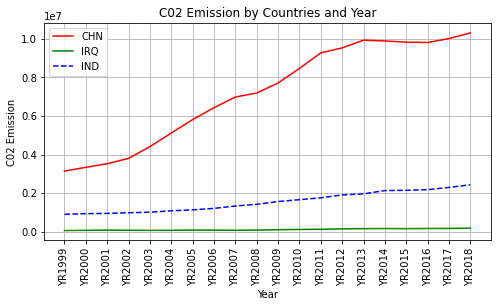

In [6]:
plt.figure(figsize=(8,4))
plt.title('C02 Emission by Countries and Year')
plt.plot(df1['CHN'],"r-",label="CHN")
plt.plot(df1['IRQ'],"g-",label="IRQ")
plt.plot(df1['IND'],"b--",label="IND")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("C02 Emission")
plt.legend(loc="upper left")
plt.grid()
plt.show()

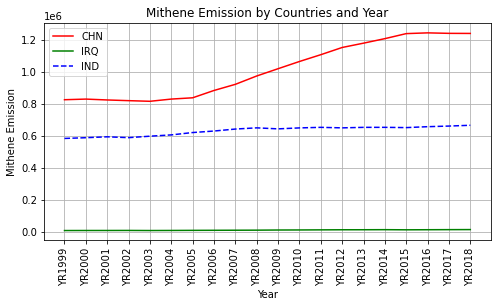

In [7]:
plt.figure(figsize=(8,4))
plt.title('Mithene Emission by Countries and Year')
plt.plot(df2['CHN'],"r-",label="CHN")
plt.plot(df2['IRQ'],"g-",label="IRQ")
plt.plot(df2['IND'],"b--",label="IND")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Mithene Emission")
plt.grid()
plt.legend(loc="best")
plt.show()

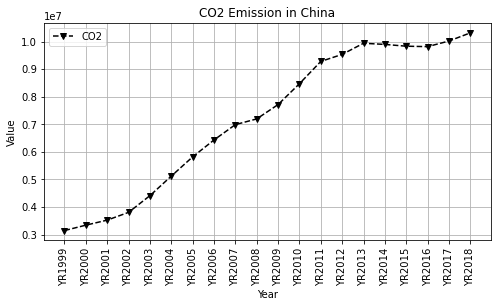

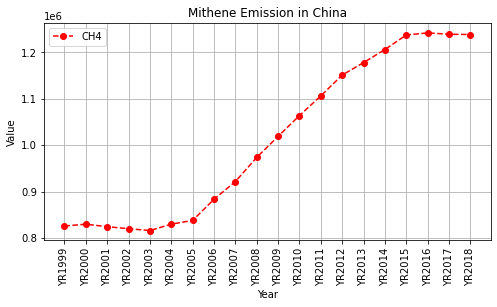

In [8]:
plt.figure(figsize=(8,4))
plt.title('CO2 Emission in China')
plt.plot(df1['CHN'],"kv--",label="CO2")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()
plt.figure(figsize=(8,4))
plt.title('Mithene Emission in China')
plt.plot(df2['CHN'],"ro--",label="CH4")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()

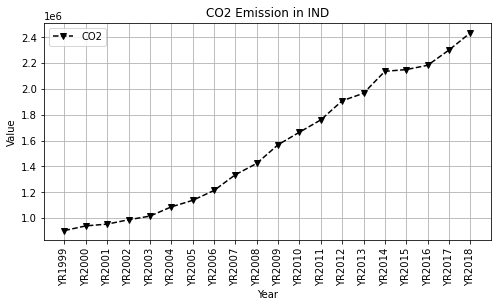

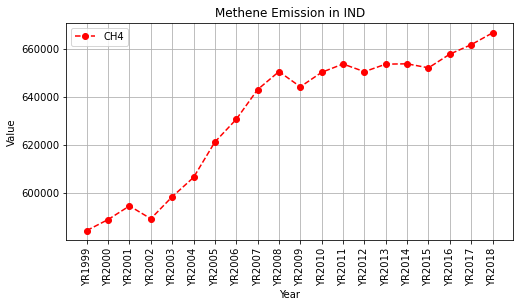

In [9]:
plt.figure(figsize=(8,4))
plt.title('CO2 Emission in IND')
plt.plot(df1['IND'],"kv--",label="CO2")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()
plt.figure(figsize=(8,4))
plt.title('Methene Emission in IND')
plt.plot(df2['IND'],"ro--",label="CH4")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [10]:
def normlz(data):
    nm=normalize(data)
    return nm
data=normlz(df1.values)

In [11]:
aggl = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
yhat = aggl.fit_predict(data)
clusters = np.unique(yhat)
clusters

array([0, 1, 2], dtype=int64)

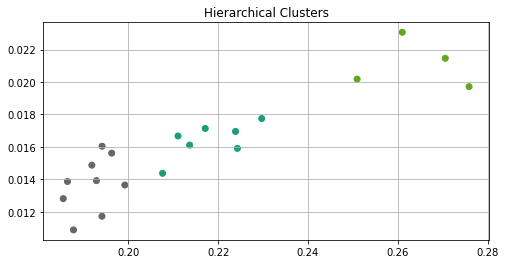

In [12]:
plt.figure(figsize=(8,4))
plt.title('Hierarchical Clusters')
plt.scatter(data[:,1],data[:,2], c=aggl.labels_, cmap='Dark2')
plt.grid()
plt.show()

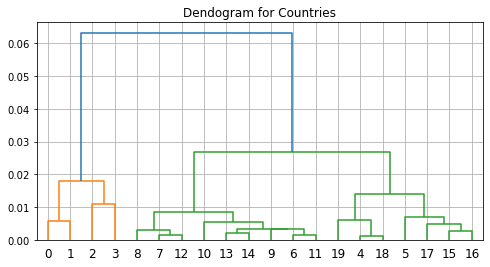

In [16]:
plt.figure(figsize=(8,4))
plt.title("Dendogram for Countries")
dend = shc.dendrogram(shc.linkage(data, method='centroid'))
plt.grid()
plt.show()

## Curve Fitting

In [18]:
from scipy.optimize import curve_fit
#!pip install lmfit
from lmfit import Model

In [19]:
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

In [20]:
norml = normlz(df2.values)
y = gaussian(norml[:,1], 2.33, 0.21, 1.51) + np.random.normal(0, 0.2, norml.shape[0])
init_vals = [1,0,1] 
best_vals, covar = curve_fit(gaussian, norml[:,1], y, p0=init_vals,maxfev=8000)
gaus_model = Model(gaussian)
res = gaus_model.fit(y, x=norml[:,2], amp=5, cen=5, wid=1)
print(res.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 53
    # data points      = 20
    # variables        = 3
    chi-square         = 0.86097405
    reduced chi-square = 0.05064553
    Akaike info crit   = -56.9084637
    Bayesian info crit = -53.9212669
##  Warning: uncertainties could not be estimated:
[[Variables]]
    amp:  43449.6344 +/-        nan (nan%) (init = 5)
    cen: -330.729752 +/-        nan (nan%) (init = 5)
    wid:  98.4282254 +/-        nan (nan%) (init = 1)


In [21]:
res

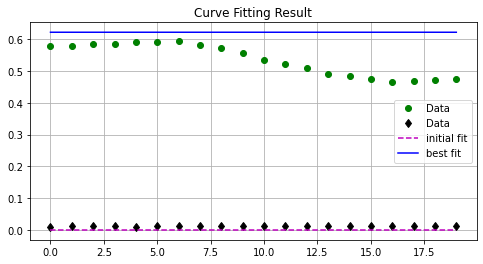

In [22]:
plt.figure(figsize=(8,4))
plt.title('Curve Fitting Result')
plt.plot(norml[:,1],"go",label="Data")
plt.plot(norml[:,2],"kd",label="Data")
plt.plot(res.init_fit, 'm--', label='initial fit')
plt.plot(res.best_fit, 'b-', label='best fit')
plt.legend()
plt.grid()
plt.show()